In [2]:
from sklearn import datasets
import pandas
import seaborn

We will load the dataset using sklearn's dataset module that is include in the package. This gives us the dataset as a dictionary with the following keys:

In [3]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The keys of interests are:
- data = this contains the 4 features (length and width of the sepal and petal) and 150 instances. So it's 2D array of shape (150, 4) 
- feature_names = row of the column names. Shape (1, 4)
- target = column of species index. Shape (150, 1)
- target_names = row of species' name. Shape (1, 4)

For data analysis, we will convert the iris data to a pandas dataframe by provide the data and the column names. Then, we add a column named 'species' and map the species name from the target column.

In [4]:
df = pandas.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

Now lets see the dataframe. We have 150 rows and 5 columns.

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Now let us get some basic statistics of the dataframe. We will the `df.describe()` to output the count, mean, standard deviation, minimum, maximum and the first 3 quartiles of the numerical columns.

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


But maybe we want to see the statistics within the species. For that we will group the data by the species column and aggregate the columns.

In [7]:
df.groupby('species').agg(['count','mean','std'])

sepal length (cm)                  sepal width (cm)         \
                       count   mean       std            count   mean   
species                                                                 
setosa                    50  5.006  0.352490               50  3.428   
versicolor                50  5.936  0.516171               50  2.770   
virginica                 50  6.588  0.635880               50  2.974   

                     petal length (cm)                  petal width (cm)  \
                 std             count   mean       std            count   
species                                                                    
setosa      0.379064                50  1.462  0.173664               50   
versicolor  0.313798                50  4.260  0.469911               50   
virginica   0.322497                50  5.552  0.551895               50   

                             
             mean       std  
species                      
setosa      0.246  0.105386  
versicolor  1.326  0.197753  
virginica   2.026  0.274650

Enough statistics, now let's see a chart. We will create a pair plot to see scatter plots for all pairs of the features using seaborn package. We provide the data and specify which column contains the categories.

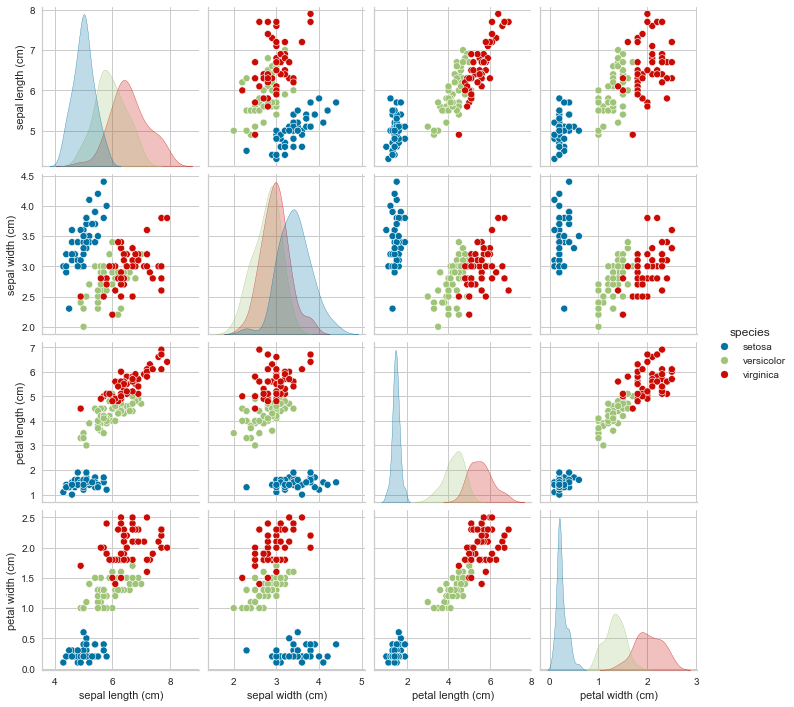

In [8]:
seaborn.pairplot(data = df, hue='species')

We know that there are 3 clusters but can a machine tell us? For that we will use k-means clustering and using elbow plots to determine the optimal number of clusters. 

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

X, y = iris.data, iris.target

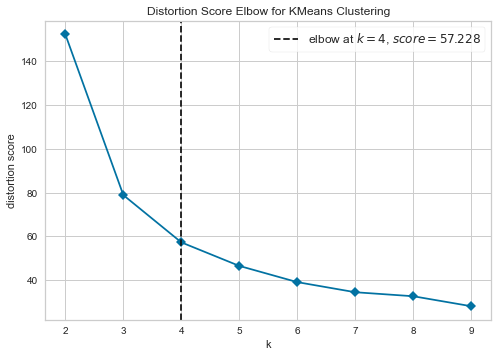

In [16]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

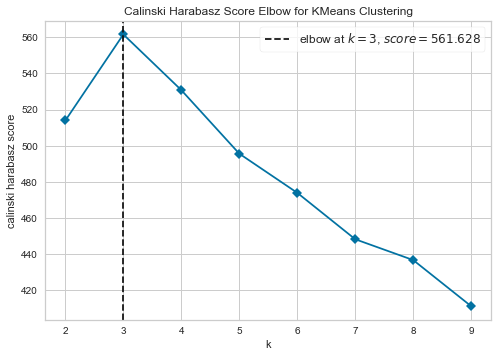

In [17]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure